<a href="https://colab.research.google.com/github/Rinzler122/AVENGERS/blob/master/Series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np

In [9]:
raw_data = pd.read_csv("Index2018.csv")

In [22]:
df = raw_data.copy()

In [23]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [ ]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [ ]:
df.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [ ]:
df.isna().sum() #contar valores NA

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

**Plotting the Data**

In [ ]:
import matplotlib.pyplot as plt

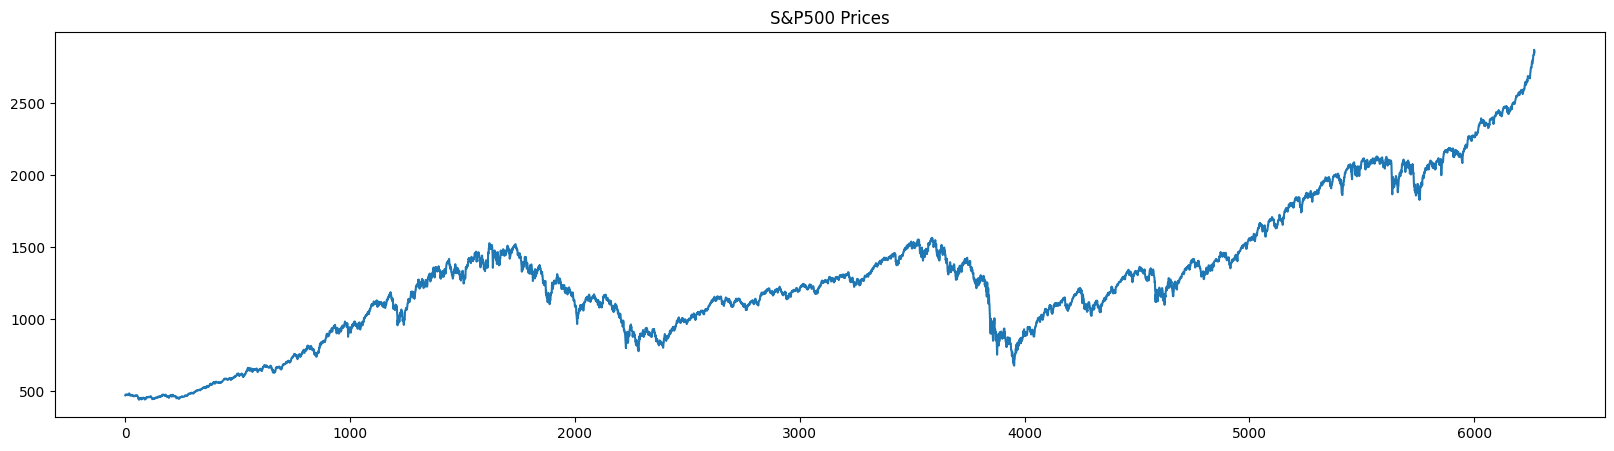

In [ ]:
df.spx.plot(figsize=(20,5), title="S&P500 Prices")
plt.show()

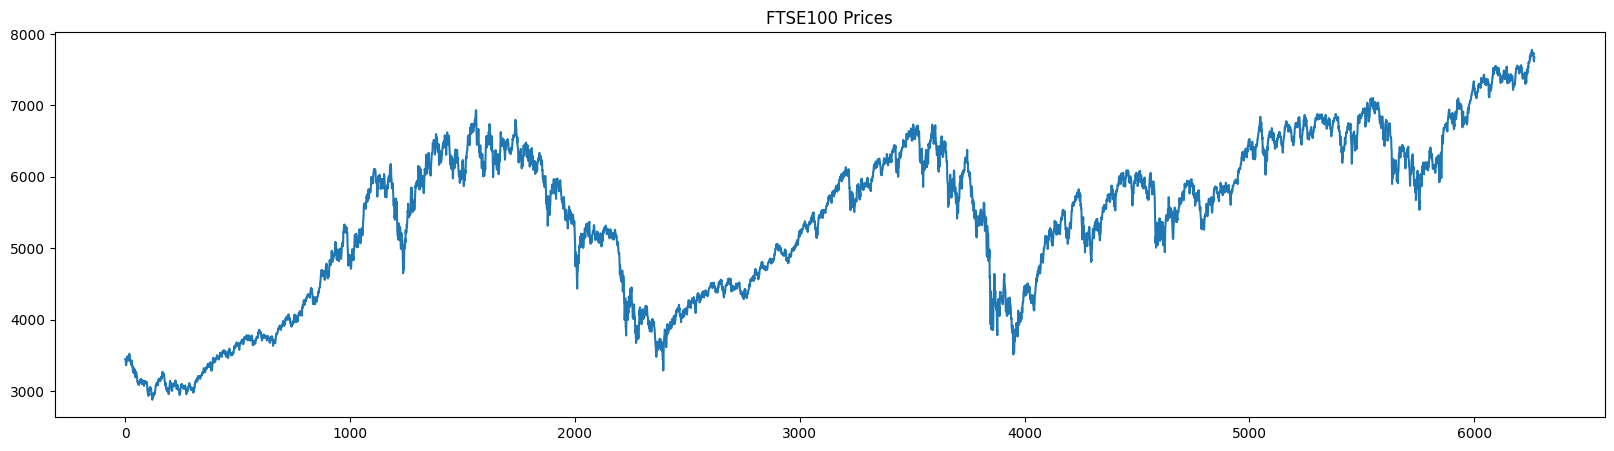

In [ ]:
df.ftse.plot(figsize=(20,5), title="FTSE100 Prices")
plt.show()

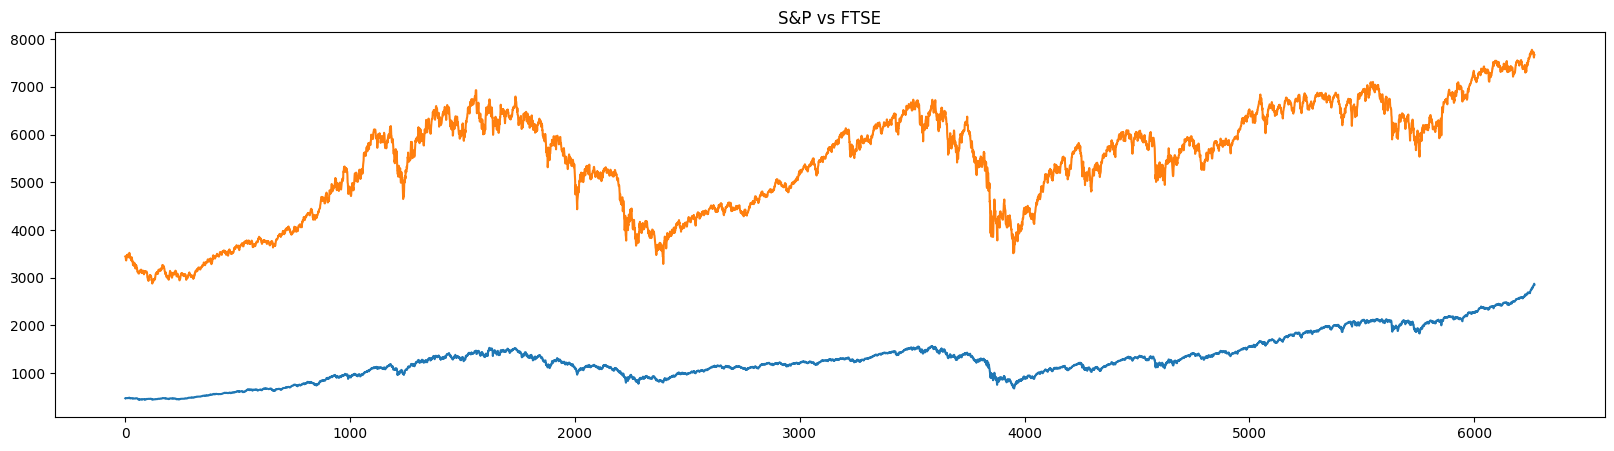

In [ ]:
df.spx.plot(figsize=(20,5), title="S&P500 Prices")
df.ftse.plot(figsize=(20,5), title="FTSE100 Prices")
plt.title("S&P vs FTSE")
plt.show()

**The QQ plot**

In [ ]:
import scipy.stats as stats

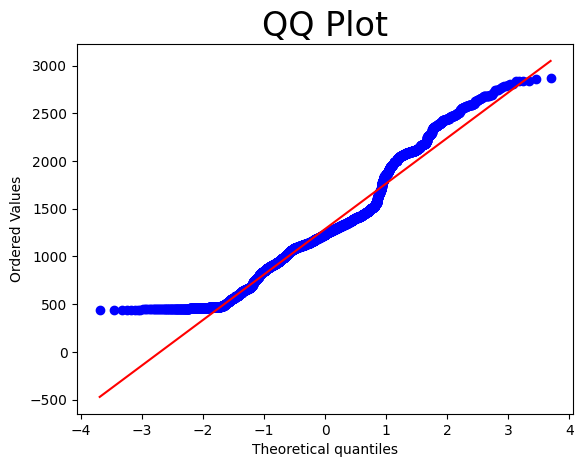

In [ ]:
stats.probplot(df.spx, plot = plt)
plt.title ("QQ Plot", size = 24)
plt.show()  # No se distribuyen de forma normal

In [24]:
df.date = pd.to_datetime(df.date, dayfirst = True)

In [25]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [21]:
df.date.describe()

<ipython-input-21-f7d3fa946723>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.date.describe()


count       0
unique      0
top       NaN
freq      NaN
Name: date, dtype: object

In [26]:
df.set_index("date", inplace=True)

In [38]:
df

,spx,dax,ftse,nikkei,Market value
date,,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01,469.900000
1994-01-08,469.900000,2225.00,3445.980000,NaN,469.900000
1994-01-09,469.900000,2225.00,3445.980000,NaN,469.900000
1994-01-10,475.270000,2225.00,3440.580000,18443.44,475.270000
1994-01-11,474.130000,2228.10,3413.770000,18485.25,474.130000
...,...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49,2839.253031
2018-01-26,2872.867839,13340.17,7665.541292,23631.88,2872.867839
2018-01-27,2872.867839,13324.48,7665.541292,NaN,2872.867839


In [39]:
df = df.asfreq('d')

In [32]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,469.90,2225.00,3445.98,NaN
1994-01-09,469.90,2225.00,3445.98,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


from matplotlib import pyplot as plt
_df_0['spx'].plot(kind='hist', bins=20, title='spx')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['dax'].plot(kind='hist', bins=20, title='dax')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ftse'].plot(kind='hist', bins=20, title='ftse')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['nikkei'].plot(kind='hist', bins=20, title='nikkei')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='spx', y='dax', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='dax', y='ftse', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='ftse', y='nikkei', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dax']
  ys = series['spx']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('dax', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dax')
_ = plt.ylabel('spx')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dax']
  ys = series['ftse']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('dax', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dax')
_ = plt.ylabel('ftse')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dax']
  ys = series['nikkei']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('dax', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dax')
_ = plt.ylabel('nikkei')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['dax']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'dax'}, axis=1)
              .sort_values('dax', ascending=True))
  xs = counted['dax']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('dax', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dax')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['spx'].plot(kind='line', figsize=(8, 4), title='spx')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['dax'].plot(kind='line', figsize=(8, 4), title='dax')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['ftse'].plot(kind='line', figsize=(8, 4), title='ftse')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['nikkei'].plot(kind='line', figsize=(8, 4), title='nikkei')
plt.gca().spines[['top', 'right']].set_visible(False)

In [44]:
df.spx = df.spx.fillna(method='ffill')
df.dax = df.dax.fillna(method='bfill')
df.ftse = df.ftse.fillna(method='ffill')
df.nikkei = df.nikkei.fillna(value=df.mean())
df.nikkei = df.nikkei.fillna(method = "ffill")
# La media no tiene sentido

In [45]:
df.isna().sum()

spx             0
dax             0
ftse            0
nikkei          0
Market value    0
dtype: int64

*Utilizamos unicamente una variable que es la que necesitamos.*


In [37]:
df['Market value'] = df.spx

In [46]:
del df ['dax']
del df ['spx']
del df ['ftse']
del df ['nikkei']

In [48]:
df.describe()

,Market value
count,8789.000000
mean,1288.624342
std,488.039397
min,438.920000
25%,990.637242
50%,1234.180000
75%,1460.250000
max,2872.867839
